In [16]:
# Importing necessary libraries for data cleaning and exploration
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [17]:
# Load the dataset
df = pd.read_csv('Data/QF632_Project_1.csv')

# Examine the structure and summary
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1038 entries, 0 to 1037
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1038 non-null   object 
 1   Signal     1038 non-null   float64
 2   Open       1038 non-null   float64
 3   High       1038 non-null   float64
 4   Low        1038 non-null   float64
 5   Close      1038 non-null   float64
 6   Adj Close  1038 non-null   float64
dtypes: float64(6), object(1)
memory usage: 56.9+ KB
None
            Signal         Open         High          Low        Close  \
count  1038.000000  1038.000000  1038.000000  1038.000000  1038.000000   
mean     16.766190   141.847360   142.691801   140.907746   141.840973   
std       3.095783    18.475574    18.470255    18.404504    18.497010   
min       0.000000    94.080002    95.400002    93.639999    94.790001   
25%      14.691150   132.132496   132.912495   130.542503   131.824993   
50%      17.298240   146.769997 

# Table of Contents <a name="tableofcontents"></a>
1. [Review the quality of the data, list any potential errors, and propose corrected values. Please list each quality check error and correction applied.](#part1)
2. [Please analyze the signal’s effectiveness or lack thereof in forecasting ETF price, using whatever metrics you think are most relevant.](#part2)
3. [Run any exploratory data analysis you think is important and highlight any interesting insights you come across. ](#part3)

# part1 
Review the quality of the data, list any potential errors, and propose corrected values. Please list each quality check error and correction applied.

a.	Check object types

b.	Check for nan values

    i.	Interpolate or forward fill. If interpolate, be careful not to include future rows 

c.	Difference all first

d.	Scatter plot/boxplot for outliers

    i.	See if need outlier handling (If no, maybe justify why)


In [18]:
def length_test(df):
    # Check the length of the dataset
    if len(df) > 0:
        result = True
    elif len(df) == 0:
        result = False
    return result

In [19]:
def missing_test(df):
    # Check for missing values
    missing_values = df.isnull().sum()
    if len(missing_values) > 0:
        result = True
    elif len(missing_values) == 0:
        result = False
    return result

In [20]:
def duplicate_test(df):
    # Check for duplicated rows
    duplicated_rows = df[df.duplicated()]
    if duplicated_rows.empty:
        result = True
    elif len(duplicated_rows) > 0:
        result = False
        df = df.drop_duplicates()
    return result, df

In [21]:
def date_test(df):
    # Ensure dates are in the right format and sequence
    date_check = df['Date'].apply(pd.to_datetime, errors='coerce').isnull().sum()
    if date_check == 0:
        result = True
    elif date_check != 0:
        result = False
    return result

In [22]:
df.columns

Index(['Date', 'Signal', 'Open', 'High', 'Low', 'Close', 'Adj Close'], dtype='object')

In [23]:
def datatype_test(df):
    pass

In [38]:
def non_positive_test(df):
    # Identify the columns to check (excluding the 'Date' column)
    columns = [col for col in df.columns if col != 'Date']
    # Check each column for non-negative and non-zero values
    non_positive_values = {col: (df[col] <= 0).sum() for col in columns}
    
    # Overall result: True if all columns pass the test, otherwise False
    result = all(non_positive_values.values())
    
    return result, non_positive_values

non_positive_check, non_positive_values = non_positive_test(df)

print(f'non_positive_check: {non_positive_check}')
print(f'non_positive_values: {non_positive_values}')

non_positive_check: False
non_positive_values: {'Signal': 6, 'Open': 0, 'High': 0, 'Low': 0, 'Close': 0, 'Adj Close': 1}


In [25]:
# Review the quality of the data
def review_data_quality(df):
    errors = []
    
    # Check the length of the dataset
    length_check = length_test(df)
    
    # Check for missing values
    missing_check = missing_test(df)
    
    # Check for duplicated rows
    duplicate_check, df = duplicate_test(df)
        
    # Check dates are in the right format and sequence
    date_check = date_test(df)
    
    # Check Object DataTypes
    # datatype_check = datatype_test(df)
        # Check and correct data types
    expected_types = {
        'Date': 'datetime64[ns]',
        'Signal': 'float64',
        'Open': 'float64',
        'High': 'float64',
        'Low': 'float64',
        'Close': 'float64',
        'Adj Close': 'float64',
    }
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
    df['Signal'] = pd.to_numeric(df['Signal'], errors='coerce')
    df['Open'] = pd.to_numeric(df['Open'], errors='coerce')
    df['High'] = pd.to_numeric(df['High'], errors='coerce')
    df['Low'] = pd.to_numeric(df['Low'], errors='coerce')
    df['Close'] = pd.to_numeric(df['Close'], errors='coerce')
    df['Adj Close'] = pd.to_numeric(df['Adj Close'], errors='coerce')
    
    # Collect errors for data type mismatches
    for column, expected_type in expected_types.items():
        if df[column].dtype != expected_type:
            errors.append(f"Column '{column}' is of type {df[column].dtype} but expected {expected_type}.")

    # Check for NaN values and handle them
    nan_summary = df.isna().sum()
    nan_columns = nan_summary[nan_summary > 0].index.tolist()

    for column in nan_columns:
        errors.append(f"Column '{column}' has {nan_summary[column]} NaN values.")
        # Interpolate or forward fill, careful not to include future rows
        df[column] = df[column].interpolate(method='linear', limit_direction='forward')
        # Fill remaining NaNs if interpolation cannot fill them
        df[column] = df[column].fillna(method='ffill')
    
    non_positive_check, non_positive_values = non_positive_test(df)
    print(f'non_positive_values {non_positive_values}')
    return errors, df

In [26]:
# Difference all columns except Date
def difference_columns(df):
    df_diff = df.copy()
    df_diff.iloc[:, 1:] = df_diff.iloc[:, 1:].diff()
    return df_diff.dropna()

In [29]:
# Main cleaning function
def clean_data(file_path):
    # Load data
    df = pd.read_csv(file_path)
    
    # Review data quality and apply corrections
    errors, df_cleaned = review_data_quality(df)
    
    # Difference all columns except Date
    df_diff = difference_columns(df_cleaned)
    
    return errors, df_cleaned, df_diff

In [39]:
# Usage example
errors, df_cleaned, df_diff = clean_data('Data/QF632_Project_1.csv')

print('df_cleaned length', len(df_cleaned))
print('df_diff length', len(df_diff))


# Output the results
print("Data Quality Errors and Corrections:")
for error in errors:
    print(error)


non_positive_values {'Signal': 6, 'Open': 0, 'High': 0, 'Low': 0, 'Close': 0, 'Adj Close': 1}
df_cleaned length 1038
df_diff length 1037
Data Quality Errors and Corrections:


In [40]:
print("\nCleaned Data:")
print(df_cleaned.info())
print(df_cleaned.describe())


Cleaned Data:
        Date     Signal        Open        High         Low       Close  \
0 2015-11-19  13.768540  116.440002  116.650002  115.739998  116.059998   
1 2015-11-20  13.608819  116.480003  117.360001  116.379997  116.809998   
2 2015-11-23  12.990589  116.709999  117.889999  116.680000  117.389999   
3 2015-11-24  12.667435  116.879997  118.419998  116.559998  118.250000   
4 2015-11-25  13.019910  118.300003  119.320000  118.110001  119.169998   

    Adj Close  
0  108.281601  
1  108.981323  
2  109.522453  
3  110.324837  
4  111.183159  

Differenced Data:
        Date    Signal      Open      High       Low     Close  Adj Close
1 2015-11-20 -0.159721  0.040001  0.709999  0.639999  0.750000   0.699722
2 2015-11-23 -0.618230  0.229996  0.529998  0.300003  0.580001   0.541130
3 2015-11-24 -0.323154  0.169998  0.529999 -0.120002  0.860001   0.802384
4 2015-11-25  0.352475  1.420006  0.900002  1.550003  0.919998   0.858322
5 2015-11-27 -0.140091  0.969994  0.580002  0.769

In [ ]:
print("\nDifferenced Data:")
print(df_diff.info())
print(df_diff.describe())

# Plotting


In [ ]:
# Identify outliers using IQR method
def identify_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return (series < lower_bound) | (series > upper_bound)

In [ ]:
# Plotting functions for outlier detection
def plot_outliers(df):
    numeric_columns = df.select_dtypes(include=['float64']).columns

    # Scatter plots with outliers highlighted
    for column in numeric_columns:
        plt.figure(figsize=(10, 6))
        plt.scatter(df['Date'], df[column], alpha=0.5, label='Data')
        
        # Identify and plot outliers
        outliers = identify_outliers(df[column])
        plt.scatter(df['Date'][outliers], df[column][outliers], color='red', label='Outliers')
        
        plt.title(f'Scatter Plot of {column} over Time')
        plt.xlabel('Date')
        plt.ylabel(column)
        plt.legend()
        plt.show()

    # Box plots
    plt.figure(figsize=(15, 10))
    df[numeric_columns].boxplot()
    plt.title('Box Plot of Numeric Columns')
    plt.xticks(rotation=45)
    plt.show()

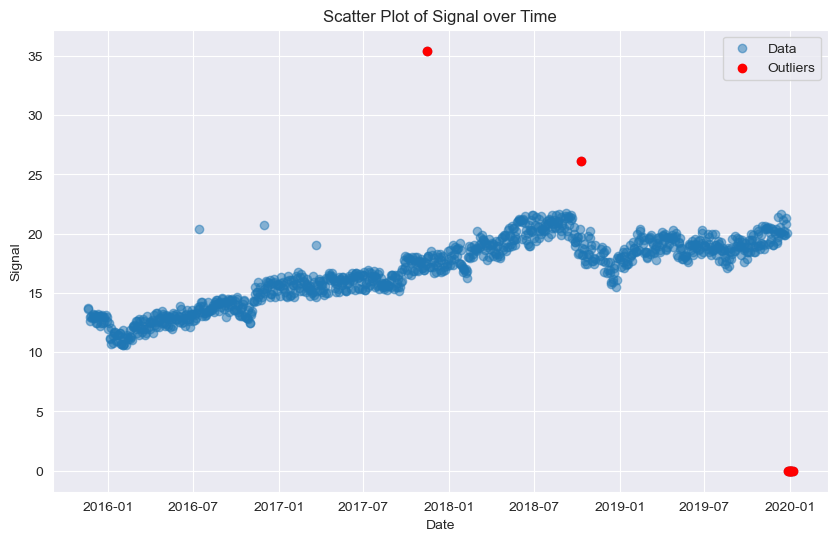

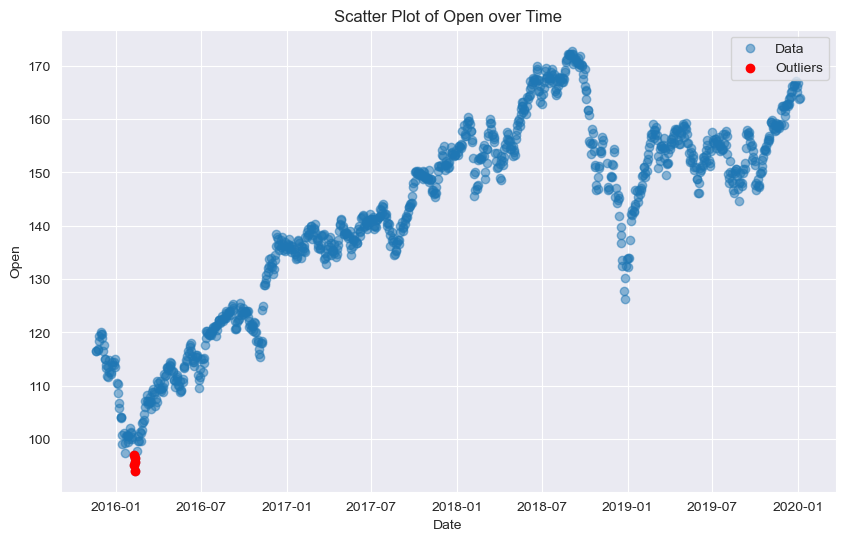

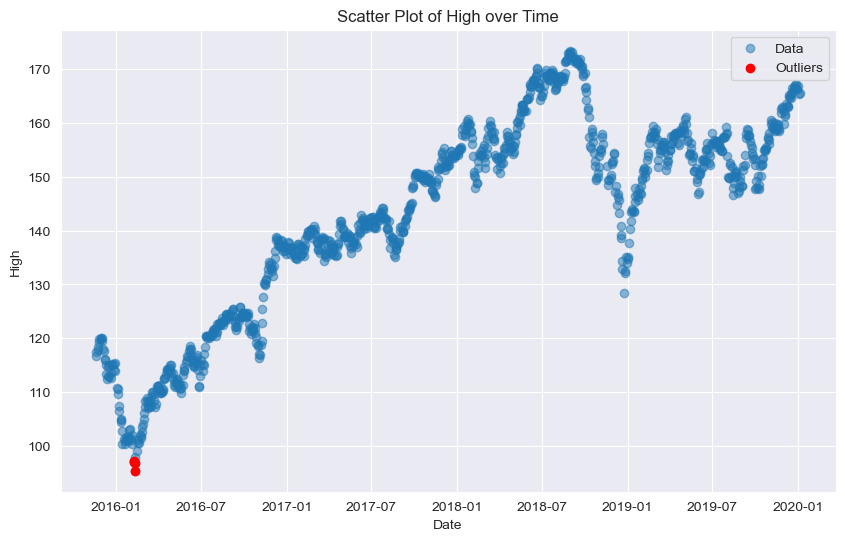

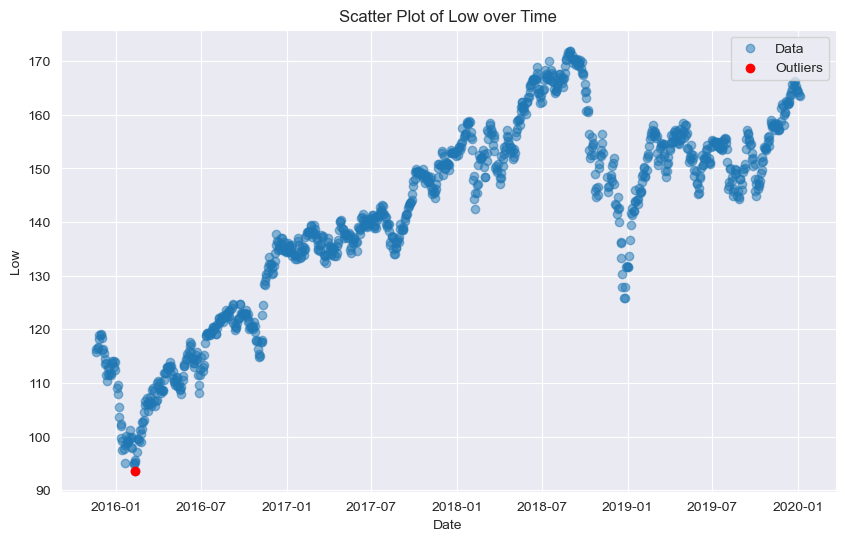

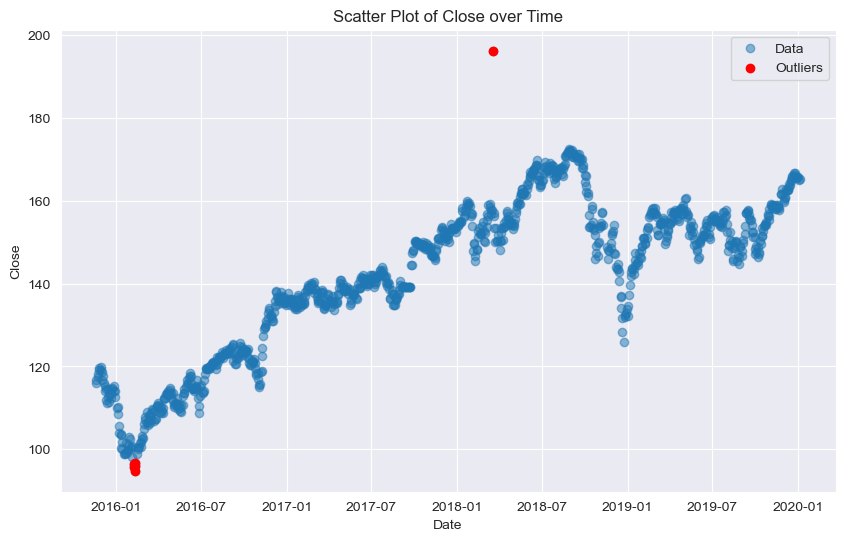

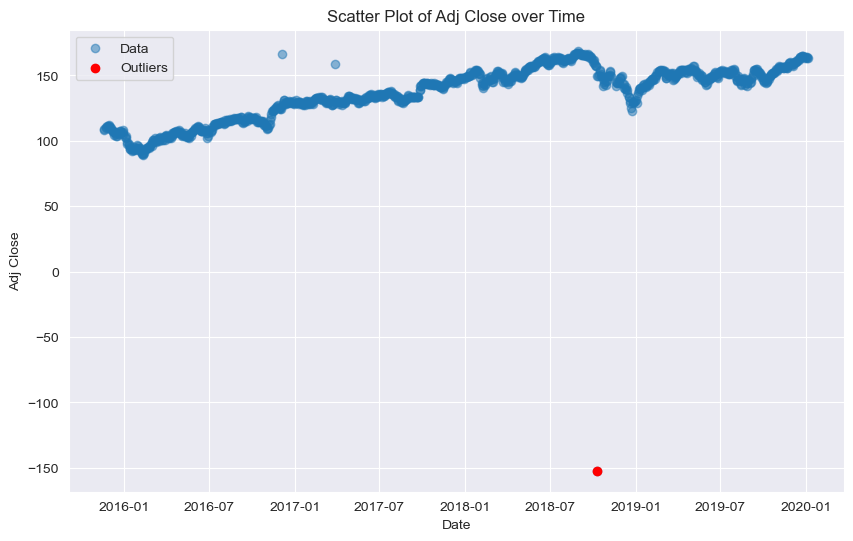

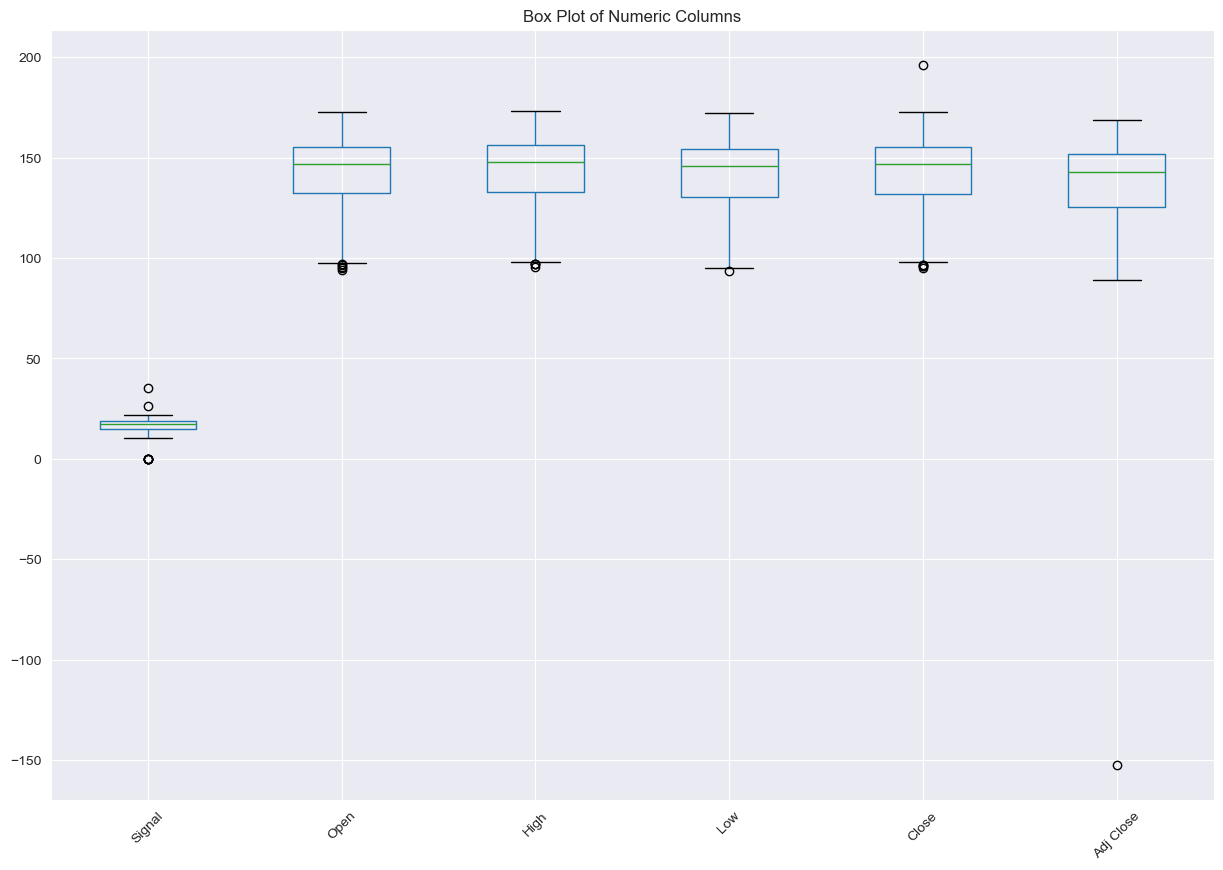

In [31]:
# Plotting outliers

plot_outliers(df_cleaned)
# TimeSeries price
# Continuous Nature:
# Time series price data is typically continuous during regular trading hours, meaning there should not have large, abrupt changes from one point to the next during this period.
# 
# After-Hours Trading:
# Prices can exhibit significant gaps between the closing price of one day and the opening price of the next trading day due to after-hours trading activities, news, earnings reports, and other factors.
# These gaps can appear as outliers when the data is visualized or analyzed.

# part2
Please analyze the signal’s effectiveness or lack thereof in forecasting ETF price, using whatever metrics you think are most relevant.


a.	Cross correlation

b.	Kurtosis & skew

c.	R2 score from Lasso, Ridge & RandomForest

d.	ACF, PACF of signal, ETF


# part3 
Run any exploratory data analysis you think is important and highlight any interesting insights you come across.

a.	Uhhh same as parts 1 &2 unless yall can think of smth else


[Return to the Top](#part1-)